In [1]:

#####################################              Data Analysis & Cleaning               ######################################

# import sys
# !{sys.executable} -m pip install wordcloud

## Importing libraries
import pandas as pd
from collections import Counter
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np


## Loading cleaned data in DTM form from a pickle file 
data = pd.read_pickle('data_in_dtm.pkl')
data = data.transpose()


## Finding the top 35 words said by each comedian
top35_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(35)
    top35_dict[c]= list(zip(top.index, top.values))


## Printing the top 15 words said by each comedian
for comedian, top_words in top35_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('\n')
    

## Pulling out the top 35 words for each comedian and storing them in a single list
words = []
for comedian in data.columns:
    top = [word for (word, count) in top35_dict[comedian]]
    for t in top:
        words.append(t)

## Aggregating this list and identifying the most common words along with how many routines they occur in
Counter(words).most_common()

## Excluding the words that are used by atleast half the number of comedians and adding them into the list of stop-words
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]


## Reading the cleaned data from a pickle file
data_clean = pd.read_pickle('data_clean.pkl')

## Adding new stop-words to the already existing list of English stop-words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

## Cleaning the data again and recreating the document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.Transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index


## Pickle it for later use
pickle.dump(cv, open("cv_with_new_stop-words.pkl", "wb"))
data_stop.to_pickle("data_in_dtm_cleaner.pkl")
data_stop

Adam Sandler
like, im, fucking, know, got, yeah, just, right, phone, dont, oh, fuck, thats, guy


Ali Wong
like, just, baby, dont, know, im, shit, oh, come, got, okay, thats, yeah, husband


Aziz Ansari
like, know, just, im, uh, people, right, dont, cause, youre, yeah, oh, okay, think


Daniel Sloss
like, just, im, know, fucking, thats, dont, oh, cause, going, youre, love, think, want


Gabriel “Fluffy” Iglesias
like, im, know, dont, just, hes, said, right, going, got, snoop, thats, people, okay


Hannah Gadsby
know, dont, im, just, like, story, time, people, thats, man, good, men, tension, said


Hasan Minhaj
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan


John Mulaney
like, dont, im, said, just, know, people, going, youre, guy, thats, say, horse, wife


Mike Birbiglia
like, im, said, know, dont, thats, gonna, want, think, just, better, jen, says, couch


Sebastian Maniscalco
like, im, got, dont, know, gonna, just, right, wife, youre, guy, come, sh

,aah,aaliyah,abandoned,abdomen,abducted,abduction,abduljabbar,abhorrent,ability,abki,...,zip,ziploc,zipper,zippo,zips,zombies,zone,zoo,zoom,zyrtec
Adam Sandler,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,2,0,0
Ali Wong,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Aziz Ansari,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Daniel Sloss,3,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Gabriel “Fluffy” Iglesias,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hannah Gadsby,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Hasan Minhaj,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
John Mulaney,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,1
Mike Birbiglia,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,2,0,0,2,0
Sebastian Maniscalco,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


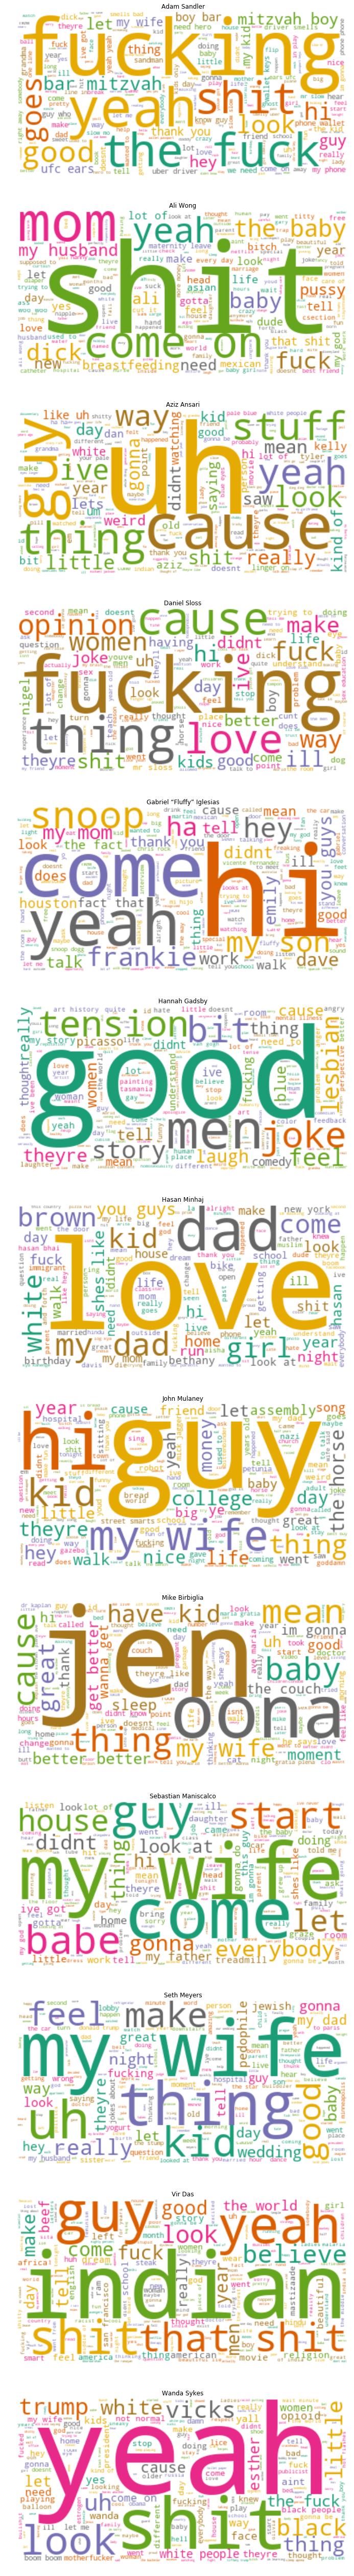

In [9]:

#####################################            Visualizing most-common words           ######################################

## Setting WordCloud parameters
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=150, random_state=42)

## Resetting the output dimensions
plt.rcParams['figure.figsize'] = [110, 85]

comedian_names = ['Adam Sandler', 'Ali Wong', 'Aziz Ansari', 'Daniel Sloss', 'Gabriel “Fluffy” Iglesias', 'Hannah Gadsby', 'Hasan Minhaj', 'John Mulaney', 'Mike Birbiglia', 'Sebastian Maniscalco', 'Seth Meyers', 'Vir Das', 'Wanda Sykes']

## Creating subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.Transcript[comedian])
    plt.subplot(13, 1, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(comedian_names[index])

## Displaying the WordCloud for each comedian
plt.show()

In [10]:

#####################################            Finding unique number of words           ######################################

## Identifying the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

## Creating a new data-frame that contains this unique word count
data_words = pd.DataFrame(list(zip(comedian_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
12,Wanda Sykes,1053
9,Sebastian Maniscalco,1106
10,Seth Meyers,1205
2,Aziz Ansari,1305
0,Adam Sandler,1374
11,Vir Das,1396
5,Hannah Gadsby,1400
7,John Mulaney,1442
1,Ali Wong,1449
4,Gabriel “Fluffy” Iglesias,1470


In [11]:

#####################################              Finding comedian's speed              ######################################

## Finding the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
## Comedy special run times from IMDB, in minutes
run_times = [73, 64, 65, 89, 90, 69, 73, 65, 85, 65, 61, 67, 60]

## Formatting data-frame and calculating the speed
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']
data_wpm_sort = data_words.sort_values(by='words_per_minute')

## Indicator to see if things are working as expected
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Ali Wong,1449,2880,64,45.000000
9,Sebastian Maniscalco,1106,3154,65,48.523077
12,Wanda Sykes,1053,3209,60,53.483333
4,Gabriel “Fluffy” Iglesias,1470,4848,90,53.866667
11,Vir Das,1396,3640,67,54.328358
8,Mike Birbiglia,1630,4693,85,55.211765
5,Hannah Gadsby,1400,3826,69,55.449275
10,Seth Meyers,1205,3552,61,58.229508
7,John Mulaney,1442,3810,65,58.615385
0,Adam Sandler,1374,4620,73,63.287671


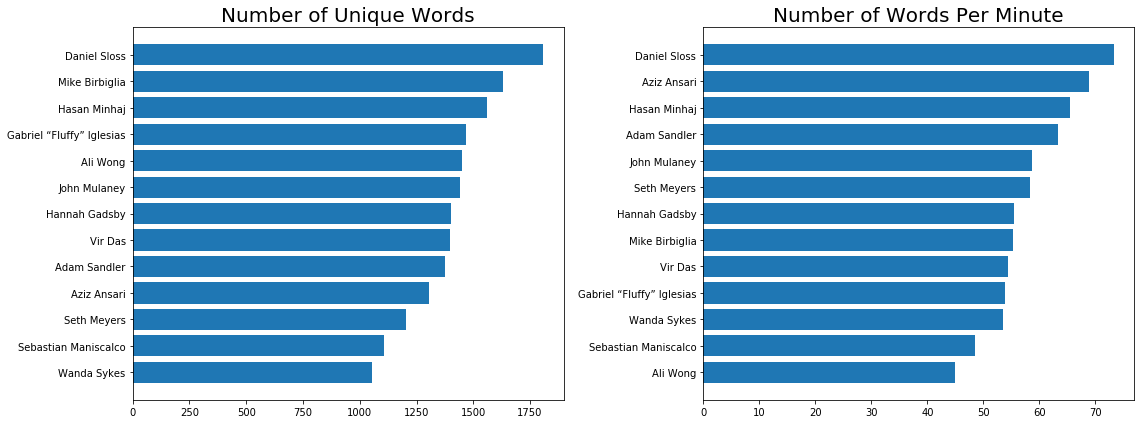

In [14]:

#####################################              Visualizing analyzed data              ######################################

## Resetting the output dimensions
plt.rcParams['figure.figsize'] = [16, 6]

## Formatting the graph parameters
y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

In [17]:

#####################################           Finding amount of Profanity             ######################################

## Searching for aforementioned bad words for each comedian
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit', 'dick', 'suck', 'shitting', 'sucking']]

data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.sucking + data_bad_words.suck,
                           data_bad_words.shitting + data_bad_words.shit, data_bad_words.dick,
                           data_bad_words.fucking + data_bad_words.fuck + data_bad_words.sucking + data_bad_words.suck +
                           data_bad_words.shitting + data_bad_words.shit + data_bad_words.dick], axis=1)
data_profanity.columns = ['fuck', 'suck', 'shit', 'dick', 'total']

## Indicator to see if things are working as expected
data_profanity

,fuck,suck,shit,dick,total
Adam Sandler,156,2,33,16,207
Ali Wong,19,7,27,12,65
Aziz Ansari,10,0,21,2,33
Daniel Sloss,132,2,21,10,165
Gabriel “Fluffy” Iglesias,1,0,5,0,6
Hannah Gadsby,21,0,8,2,31
Hasan Minhaj,24,0,16,3,43
John Mulaney,14,0,8,0,22
Mike Birbiglia,5,1,1,0,7
Sebastian Maniscalco,3,2,7,1,13


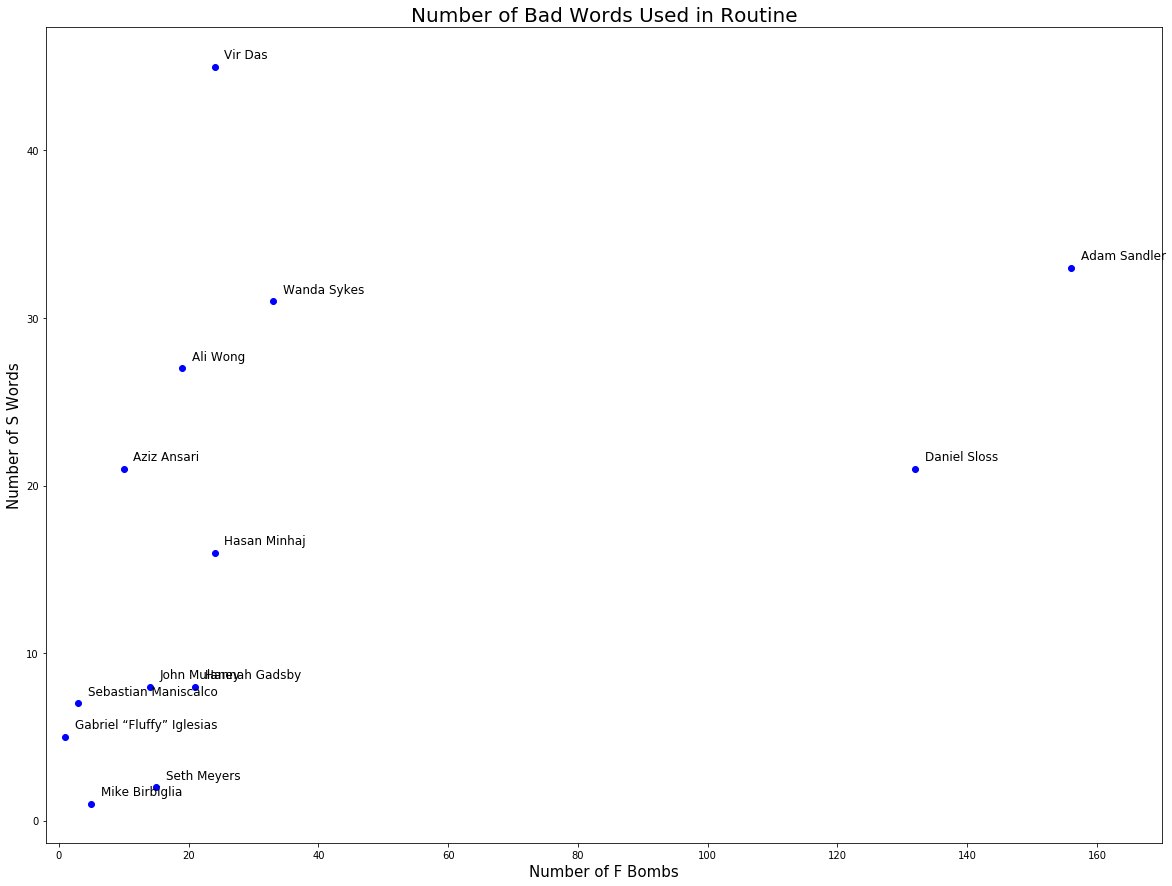

In [22]:

#####################################            Visualizing F & S Profanity              ######################################

## Resetting the output dimensions
plt.rcParams['figure.figsize'] = [20, 15]

## Formatting the graph parameters
for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.fuck.loc[comedian]
    y = data_profanity.shit.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, comedian_names[i], fontsize=12)
    plt.xlim(-2, 170)
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

## Displaying the graph
plt.show()